# How to use metrics on the surface of a sphere (of Earth Radius)
## Load packages

In [21]:
using PyPlot
using DIVAnd
using Makie, CairoMakie
using GeometryTypes

In [12]:
loni,lati = ndgrid(range(0.,stop=360.,length=200),range(-89,stop=89,length=210));

# take out last longitude to not close, that will be done by moddim
#
loni=loni[1:end-1,:]
lati=lati[1:end-1,:]

R=6371.009e3

# Cartesian coordinates for the plotting on a sphere
xi = R*cosd.(loni) .* cosd.(lati);
yi = R*sind.(loni) .* cosd.(lati);
zi =  R*sind.(lati);

mask = trues(size(loni));

## Naive analysis as if coordinates were cartesian

In [13]:
pmc = ones(size(loni)) / (loni[2,1]-loni[1,1]);
pnc = ones(size(lati)) / (lati[1,2]-lati[1,1]);
lon=[2,300,270]
lat=[45,0.0,80]
f=[1.0,-1.0,-1.0]
fi,s = DIVAndrun(mask,(pmc,pnc),(loni,lati),(lon,lat),f,(10.,10.),1.0);

In [28]:
?Makie.mesh

```
mesh(x, y, z)
mesh(mesh_object)
mesh(x, y, z, faces)
mesh(xyz, faces)
```

Plots a 3D or 2D mesh. Supported `mesh_object`s include `Mesh` types from [GeometryBasics.jl](https://github.com/JuliaGeometry/GeometryBasics.jl).

## Plot type

The plot type alias for the `mesh` function is `Mesh`.

## Attributes

**`alpha`** =  `1.0`  — The alpha value of the colormap or color attribute. Multiple alphas like in `plot(alpha=0.2, color=(:red, 0.5)`, will get multiplied.

**`backlight`** =  `0.0`  — Sets a weight for secondary light calculation with inverted normals.

**`clip_planes`** =  `automatic`  — Clip planes offer a way to do clipping in 3D space. You can set a Vector of up to 8 `Plane3f` planes here, behind which plots will be clipped (i.e. become invisible). By default clip planes are inherited from the parent plot or scene. You can remove parent `clip_planes` by passing `Plane3f[]`.

**`color`** =  `@inherit patchcolor`  — Sets the color of the mesh. Can be a `Vector{<:Colorant}` for per vertex colors or a single `Colorant`. A `Matrix{<:Colorant}` can be used to color the mesh with a texture, which requires the mesh to contain texture coordinates.

**`colormap`** =  `@inherit colormap :viridis`  — Sets the colormap that is sampled for numeric `color`s. `PlotUtils.cgrad(...)`, `Makie.Reverse(any_colormap)` can be used as well, or any symbol from ColorBrewer or PlotUtils. To see all available color gradients, you can call `Makie.available_gradients()`.

**`colorrange`** =  `automatic`  — The values representing the start and end points of `colormap`.

**`colorscale`** =  `identity`  — The color transform function. Can be any function, but only works well together with `Colorbar` for `identity`, `log`, `log2`, `log10`, `sqrt`, `logit`, `Makie.pseudolog10` and `Makie.Symlog10`.

**`cycle`** =  `[:color => :patchcolor]`  — *No docs available.*

**`depth_shift`** =  `0.0`  — adjusts the depth value of a plot after all other transformations, i.e. in clip space, where `0 <= depth <= 1`. This only applies to GLMakie and WGLMakie and can be used to adjust render order (like a tunable overdraw).

**`diffuse`** =  `1.0`  — Sets how strongly the red, green and blue channel react to diffuse (scattered) light.

**`fxaa`** =  `true`  — adjusts whether the plot is rendered with fxaa (anti-aliasing, GLMakie only).

**`highclip`** =  `automatic`  — The color for any value above the colorrange.

**`inspectable`** =  `true`  — sets whether this plot should be seen by `DataInspector`.

**`inspector_clear`** =  `automatic`  — Sets a callback function `(inspector, plot) -> ...` for cleaning up custom indicators in DataInspector.

**`inspector_hover`** =  `automatic`  — Sets a callback function `(inspector, plot, index) -> ...` which replaces the default `show_data` methods.

**`inspector_label`** =  `automatic`  — Sets a callback function `(plot, index, position) -> string` which replaces the default label generated by DataInspector.

**`interpolate`** =  `true`  — sets whether colors should be interpolated

**`lowclip`** =  `automatic`  — The color for any value below the colorrange.

**`matcap`** =  `nothing`  — *No docs available.*

**`material`** =  `nothing`  — RPRMakie only attribute to set complex RadeonProRender materials.         *Warning*, how to set an RPR material may change and other backends will ignore this attribute

**`model`** =  `automatic`  — Sets a model matrix for the plot. This overrides adjustments made with `translate!`, `rotate!` and `scale!`.

**`nan_color`** =  `:transparent`  — The color for NaN values.

**`overdraw`** =  `false`  — Controls if the plot will draw over other plots. This specifically means ignoring depth checks in GL backends

**`shading`** =  `automatic`  — Sets the lighting algorithm used. Options are `NoShading` (no lighting), `FastShading` (AmbientLight + PointLight) or `MultiLightShading` (Multiple lights, GLMakie only). Note that this does not affect RPRMakie.

**`shininess`** =  `32.0`  — Sets how sharp the reflection is.

**`space`** =  `:data`  — sets the transformation space for box encompassing the plot. See `Makie.spaces()` for possible inputs.

**`specular`** =  `0.2`  — Sets how strongly the object reflects light in the red, green and blue channels.

**`ssao`** =  `false`  — Adjusts whether the plot is rendered with ssao (screen space ambient occlusion). Note that this only makes sense in 3D plots and is only applicable with `fxaa = true`.

**`transformation`** =  `automatic`  — *No docs available.*

**`transparency`** =  `false`  — Adjusts how the plot deals with transparency. In GLMakie `transparency = true` results in using Order Independent Transparency.

**`uv_transform`** =  `automatic`  — Sets a transform for uv coordinates, which controls how a texture is mapped to a mesh. The attribute can be `I`, `scale::VecTypes{2}`, `(translation::VecTypes{2}, scale::VecTypes{2})`, any of :rotr90, :rotl90, :rot180, :swap*xy/:transpose, :flip*x, :flip*y, :flip*xy, or most generally a `Makie.Mat{2, 3, Float32}` or `Makie.Mat3f` as returned by `Makie.uv_transform()`. They can also be changed by passing a tuple `(op3, op2, op1)`.

**`visible`** =  `true`  — Controls whether the plot will be rendered or not.


In [40]:
import Pkg; Pkg.add("PlotlyJS")
using Plots; plotlyjs()  #or: pyplot()
n = 300
θ = LinRange(0,π,n)
ϕ = LinRange(0,2π,n)
xx = @. sin(θ)*cos(ϕ')
yy = @. sin(θ)*sin(ϕ')
zz = @. cos(θ)*ones(n)'
surface(xx, yy, zz, fill_z = 5*sin.(10xx .* yy), size=(600,600))

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] (cache misses: wrong dep version loaded (2), incompatible header (10))
┌ Warning: Module FFMPEG_jll with build ID fafbfcfd-c7a2-1e43-0000-07c0f4225428 is missing from the cache.
│ This may mean FFMPEG_jll [b22a6f82-2f65-5046-a5b2-351ab43fb4e5] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:2541
┌ Info: Skipping precompilation due to precompilable error. Importing Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80].
└   exception = Error when precompiling module, potentially caused by a __precompile__(false) declaration in the module.
[ Info: Precompiling FFMPEG [c87230d0-a227-11e9-1b43-d7ebe4e7570a] (cache misses: wrong dep version loaded (2), incompatible header (8))
┌ Warning: Module FFMPEG_jll with build ID fafbfcfd-c7a2-1e43-0000-07c0f4225428 is missing from the cache.
│ This may mean FFMPEG_jll [b22a6f82-2f65-5046-a5b2-351ab43fb4e5] does not support precompilation but is imported

LoadError: ArgumentError: Package PlotlyJS not found in current path.
- Run `import Pkg; Pkg.add("PlotlyJS")` to install the PlotlyJS package.

[ Info: Precompiling GLMakie [e9467ef8-e4e7-5192-8a1a-b1aee30e663a] (cache misses: wrong dep version loaded (2))
┌ Warning: Module GeometryBasics with build ID fafbfcfd-e66b-a43b-0000-07be6e99b992 is missing from the cache.
│ This may mean GeometryBasics [5c1252a2-5f33-56bf-86c9-59e7332b4326] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:2541
┌ Info: Skipping precompilation due to precompilable error. Importing GLMakie [e9467ef8-e4e7-5192-8a1a-b1aee30e663a].
└   exception = Error when precompiling module, potentially caused by a __precompile__(false) declaration in the module.
[ Info: Precompiling GLFW [f7f18e0c-5ee9-5ccd-a5bf-e8befd85ed98] (cache misses: wrong dep version loaded (2))
┌ Warning: Module Xorg_libX11_jll with build ID fafbfcfd-3bd2-e0a6-0000-07c1d5df46c2 is missing from the cache.
│ This may mean Xorg_libX11_jll [4f6342f7-b3d2-589e-9d20-edeb45f2b2bc] does not support precompilation but is imported by a module that does.
└ @ Bas

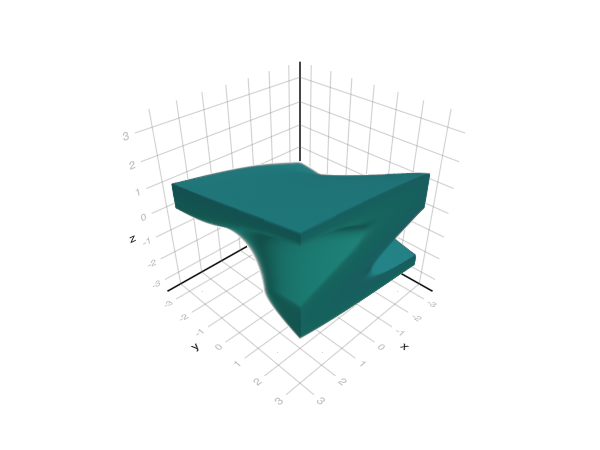

In [35]:
using GLMakie
F(h,r,x) = h + r*x - x^3
xs = ys = zs = range(-3, 3, length=100)
Makie.contour(xs, ys, zs, F, levels=[0])

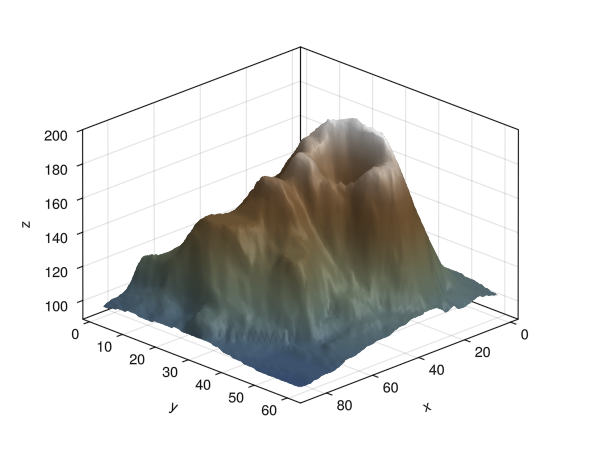

In [38]:
using GLMakie
using DelimitedFiles

volcano = readdlm(Makie.assetpath("volcano.csv"), ',', Float64)
surface(volcano,
    colormap = :darkterrain,
    colorrange = (80, 190),
    axis=(type=Axis3, azimuth = pi/4))

In [36]:
fig = Makie.Figure()

ax = Axis3(fig[1, 1], aspect = (1, 1, 1), title = "aspect = (1, 1, 1)")
s = Makie.contour3d!(ax, xi,yi,zi, surfacecolor = fi, cmin = -1.0, cmax = 1.0, showscale = false)

LoadError: Can't convert to a Vector. Please supply a range/vector/interval

In [19]:
s = Makie.surface(xi,yi,zi, surfacecolor = fi, cmin = -1.0, cmax = 1.0, showscale = false)

LoadError: Invalid attributes [31m[1msurfacecolor[22m[39m, [31m[1mcmin[22m[39m, [31m[1mcmax[22m[39m and [31m[1mshowscale[22m[39m for plot type [34m[1mSurface{Tuple{Matrix{Float64}, Matrix{Float64}, Matrix{Float32}}}[22m[39m.

The available plot attributes for Surface{Tuple{Matrix{Float64}, Matrix{Float64}, Matrix{Float32}}} are:

alpha        colorscale   inspector_clear  material   space           visible
backlight    depth_shift  inspector_hover  model      specular               
clip_planes  diffuse      inspector_label  nan_color  ssao                   
color        fxaa         interpolate      overdraw   transformation         
colormap     highclip     invert_normals   shading    transparency           
colorrange   inspectable  lowclip          shininess  uv_transform           


Generic attributes are:

clip_planes  dim_conversions  model      transformation  yautolimits        
cycle        label            rasterize  xautolimits     zautolimits        



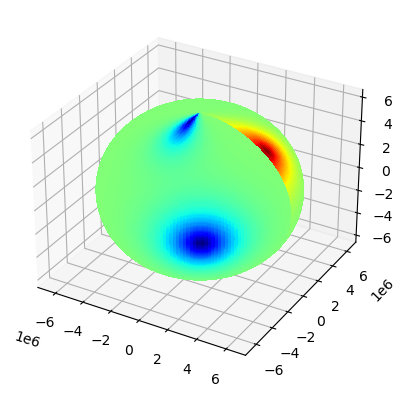

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7c966f2b8400>

In [ ]:
# The rstride and cstride arguments default to 10
surf(xi,yi,zi, rstride=1, cstride=1,facecolors=plt.get_cmap("jet")((fi.-minimum(fi))/(maximum(fi)-minimum(fi))), 
linewidth=0, antialiased=false, shade=false)

## With correct metrics and correlation length in the same metric (meters)

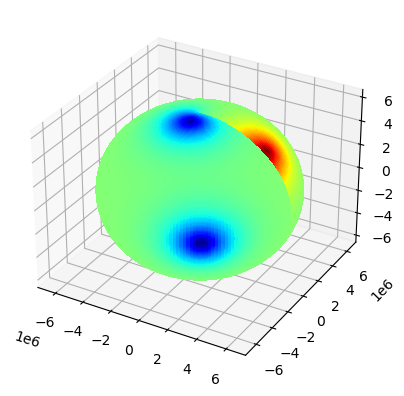

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7c964e644fa0>

In [3]:
# note that the metric function works with Earth Radius. If you have a sphere of a different radius, just scale the pm accordingly (pm are inverse of length)
pm,pn=DIVAnd_metric(loni,lati)
lon=[2,300,270]
lat=[45,0.0,80]
f=[1.0,-1.0,-1.0]
fi,s = DIVAndrun(mask,(pm,pn),(loni,lati),(lon,lat),f,(1000000.,1000000.),1.0);

# The rstride and cstride arguments default to 10
surf(xi,yi,zi, rstride=1, cstride=1,facecolors=plt.get_cmap("jet")((fi.-minimum(fi))/(maximum(fi)-minimum(fi))),
linewidth=0, antialiased=false, shade=false)

## Adding periodicity in the analysis (not the plotting mesh)

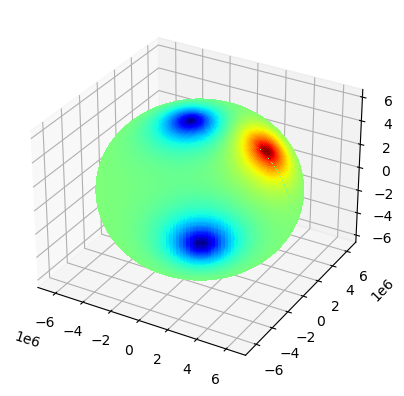

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7c964e8eab80>

In [4]:
pm,pn=DIVAnd_metric(loni,lati)
lon=[2,300,270]
lat=[45,0.0,80]
f=[1.0,-1.0,-1.0]
fi,s = DIVAndrun(mask,(pm,pn),(loni,lati),(lon,lat),f,(1000000.,1000000.),1.0,moddim=[1,0]);

# The rstride and cstride arguments default to 10
surf(xi,yi,zi, rstride=1, cstride=1,facecolors=plt.get_cmap("jet")((fi.-minimum(fi))/(maximum(fi)-minimum(fi))), 
linewidth=0, antialiased=false, shade=false)